In [1]:
using PyPlot
using Interact

  likely near C:\Users\Magy\.julia\v0.4\Interact\src\IJulia/setup.jl:153
  likely near C:\Users\Magy\.julia\v0.4\Interact\src\IJulia/setup.jl:157
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at boot.jl:261
 in include_from_node1 at loading.jl:304
 in include at boot.jl:261
 in include_from_node1 at loading.jl:304
 in include at boot.jl:261
 in include_from_node1 at loading.jl:304
 in require at loading.jl:243
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at C:\Users\Magy\.julia\v0.4\IJulia\src\execute_request.jl:177
 in eventloop at C:\Users\Magy\.julia\v0.4\IJulia\src\IJulia.jl:141
 in anonymous at task.jl:447
while loading C:\Users\Magy\.julia\v0.4\Interact\src\IJulia\statedict.jl, in expression starting on line 1


In [2]:
coinFlip(w)= (rand()< w)? 1: 0;
function CoinAssignment1(w,num)
    H= [0:0.001:1...];
    
    events= zeros(Int,1,num);
    for i=1:num
        events[i]= coinFlip(w);
    end
    
    N= num; R= sum(events);#parameters for Binomial distribution    
    likelihood= H.^R .* (1-H).^(N-R); #likelihood function follows Binomial Distribution
    
    b=1; a=0; #parameters for Uniform distribution
    perior_prob= 1/(b-a); #perior function follows Uniform distribution
    
    posterior_prob= likelihood .* perior_prob;
    
    norm= [minimum(posterior_prob) maximum(posterior_prob)];
    posterior_probNorm = (posterior_prob - norm[1])./(norm[2] - norm[1]);

    return H, posterior_prob;
end

CoinAssignment1 (generic function with 1 method)

Interact.Slider{Int64}([Reactive.Input{Int64}] 250,"n",250,1:500)

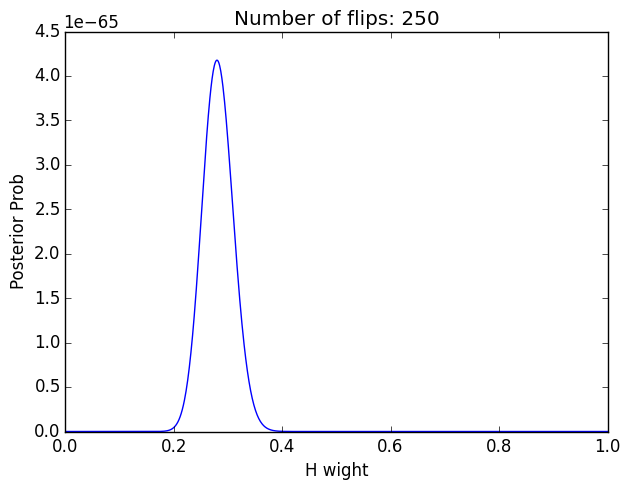

In [5]:
f3= figure(figsize=(7,5))
@manipulate for n= 1:500; withfig(f3) do
    H, posterior= CoinAssignment1(0.25,n)
    plot(H,posterior);
    ylabel("Posterior Prob")
    xlabel("H wight")
    title("Number of flips: $n")
        
end
end